In [1]:
from MinMax import *
from MinSelectivity import *
from FanOut import *
from queryParser import *
from pylab import *
import matplotlib.pyplot as plt

conn,cursor = connect_bdd("ssb")
minMax=[]
minSel=[]
fanOut=[]

sqlFiles=get_sqlFiles()
for file in sqlFiles:
    input = open(file, 'r').read()
    print("file",file)
    print("input" , input)

#q43="SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit  FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey AND  c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14' GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1;"

    minMax.append(MinMax(input,cursor,3)['energy'])
    print("\n")
    print("miiinsel")
    minSel.append( MinSelectivity(input,cursor,3)['energy'])
    print("\n")
    print("faaaaaaanout")
    fanOut.append(FanOut(input,cursor,3)['energy'])
    print("\n")
    
""""file='C:/Users/zeblahm/Desktop/SSB/MinMax/queries/q3-1.sql'
input = open(file, 'r').read()
minMax.append(MinMax(input,cursor,1)['estimatedCost'])
print("miiinsel")
minSel.append( MinSelectivity(input,cursor,1)['estimatedCost'])
fanOut.append(FanOut(input,cursor,1)['estimatedCost'])"""

print("minMax",minMax)
print("minSel",minSel)
print("fanOut",fanOut)

file C:/Users/zeblahm/Desktop/SSB/MinMax/queries\q1-1.sql
input SELECT 
  SUM(lo_extendedprice * lo_discount) AS revenue
FROM 
  lineorder l,
  date d
WHERE 
  l.lo_orderdate = d.d_datekey
  AND d.d_year = 1993
  AND l.lo_discount BETWEEN 1 AND 3
  AND l.lo_quantity < 25;

joined tables ['lineorder', 'date']
state ['date', 'lineorder']
jjjjjjjjjjjj {'select': {'value': {'sum': {'mul': ['lo_extendedprice', 'lo_discount']}}, 'name': 'revenue'}, 'from': [{'value': 'date', 'name': 'd'}, {'join': {'name': 'l', 'value': 'lineorder'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}], 'where': {'and': [{'eq': ['d.d_year', 1993]}, {'between': ['l.lo_discount', 1, 3]}, {'lt': ['l.lo_quantity', 25]}]}}
qqqqqqqqqqqqqqqqqqqq SELECT SUM(lo_extendedprice * lo_discount) AS revenue FROM date AS d JOIN lineorder AS l ON l.lo_orderdate = d.d_datekey WHERE d.d_year = 1993 AND l.lo_discount BETWEEN 1 AND 3 AND l.lo_quantity < 25
initiale power 41.290164


miiinsel
tablesWith {}
ressssssssilt {'d': [{'eq':

initiale power 41.778197999999996


file C:/Users/zeblahm/Desktop/SSB/MinMax/queries\q2-1.sql
input SELECT 
  SUM(lo_revenue),
  d_year,
  p_brand1
FROM 
  lineorder l,
  date d,
  part p,
  supplier s
WHERE 
  l.lo_orderdate = d.d_datekey
  AND l.lo_partkey = p.p_partkey
  AND l.lo_suppkey = s.s_suppkey
  AND p.p_category = 'MFGR#12'
  AND s.s_region = 'AMERICA'
GROUP BY 
  d_year,
  p_brand1
ORDER BY 
  d_year,
  p_brand1;

joined tables ['lineorder', 'date', 'part', 'supplier']
state ['date', 'lineorder', 'supplier', 'part']
jjjjjjjjjjjj {'select': [{'value': {'sum': 'lo_revenue'}}, {'value': 'd_year'}, {'value': 'p_brand1'}], 'from': [{'value': 'date', 'name': 'd'}, {'join': {'name': 'l', 'value': 'lineorder'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}, {'join': {'name': 's', 'value': 'supplier'}, 'on': {'eq': ['l.lo_suppkey', 's.s_suppkey']}}, {'join': {'name': 'p', 'value': 'part'}, 'on': {'eq': ['l.lo_partkey', 'p.p_partkey']}}], 'where': {'and': [{'eq': ['p.p_category', 

['part', 'lineorder', 'supplier', 'date']
jjjjjjjjjjjj {'select': [{'value': {'sum': 'lo_revenue'}}, {'value': 'd_year'}, {'value': 'p_brand1'}], 'from': [{'value': 'part', 'name': 'p'}, {'join': {'name': 'l', 'value': 'lineorder'}, 'on': {'eq': ['l.lo_partkey', 'p.p_partkey']}}, {'join': {'name': 's', 'value': 'supplier'}, 'on': {'eq': ['l.lo_suppkey', 's.s_suppkey']}}, {'join': {'name': 'd', 'value': 'date'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}], 'where': {'and': [{'between': ['p.p_brand1', {'literal': 'MFGR#2221'}, {'literal': 'MFGR#2228'}]}, {'eq': ['s.s_region', {'literal': 'ASIA'}]}]}, 'groupby': [{'value': 'd_year'}, {'value': 'p_brand1'}], 'orderby': [{'value': 'd_year'}, {'value': 'p_brand1'}]}
qqqqqqqqqqqqqqqqqqqq SELECT SUM(lo_revenue), d_year, p_brand1 FROM part AS p JOIN lineorder AS l ON l.lo_partkey = p.p_partkey JOIN supplier AS s ON l.lo_suppkey = s.s_suppkey JOIN date AS d ON l.lo_orderdate = d.d_datekey WHERE p.p_brand1 BETWEEN 'MFGR#2221' AND 'MFGR#2228

initiale power 41.558656


faaaaaaanout
query select count(*) from lineorder
{'c': 'customer', 'l': 'lineorder', 's': 'supplier', 'd': 'date'}
['customer', 'supplier', 'date']
ressssssssilt {'c': [{'eq': ['c.c_region', {'literal': 'ASIA'}]}], 's': [{'eq': ['s.s_region', {'literal': 'ASIA'}]}], 'd': [{'gte': ['d.d_year', 1992]}, {'lte': ['d.d_year', 1997]}]}
query SELECT COUNT(*) FROM lineorder AS l LEFT JOIN customer AS c ON l.lo_custkey = c.c_custkey WHERE c.c_region = 'ASIA'
query SELECT COUNT(*) FROM lineorder AS l LEFT JOIN supplier AS s ON l.lo_suppkey = s.s_suppkey WHERE s.s_region = 'ASIA'
query SELECT COUNT(*) FROM lineorder AS l LEFT JOIN date AS d ON l.lo_orderdate = d.d_datekey WHERE d.d_year >= 1992 AND d.d_year <= 1997
tablewithsel {'customer': 0.20037722651041884, 'supplier': 0.1996694538827338, 'date': 0.9110895178428281}
['supplier', 'lineorder', 'customer', 'date']
jjjjjjjjjjjj {'select': [{'value': 'c_nation'}, {'value': 's_nation'}, {'value': 'd_year'}, {'value': {'s

state ['date', 'lineorder', 'supplier', 'customer']
jjjjjjjjjjjj {'select': [{'value': 'c_city'}, {'value': 's_city'}, {'value': 'd_year'}, {'value': {'sum': 'lo_revenue'}, 'name': 'revenue'}], 'from': [{'value': 'date', 'name': 'd'}, {'join': {'name': 'l', 'value': 'lineorder'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}, {'join': {'name': 's', 'value': 'supplier'}, 'on': {'eq': ['l.lo_suppkey', 's.s_suppkey']}}, {'join': {'name': 'c', 'value': 'customer'}, 'on': {'eq': ['l.lo_custkey', 'c.c_custkey']}}], 'where': {'and': [{'or': [{'eq': ['c.c_city', {'literal': 'UNITED KI1'}]}, {'eq': ['c.c_city', {'literal': 'UNITED KI5'}]}]}, {'or': [{'eq': ['s.s_city', {'literal': 'UNITED KI1'}]}, {'eq': ['s.s_city', {'literal': 'UNITED KI5'}]}]}, {'gte': ['d.d_year', 1992]}, {'lte': ['d.d_year', 1997]}]}, 'groupby': [{'value': 'c_city'}, {'value': 's_city'}, {'value': 'd_year'}], 'orderby': [{'value': 'd_year', 'sort': 'asc'}, {'value': 'revenue', 'sort': 'desc'}]}
qqqqqqqqqqqqqqqqqqqq SELE

initiale power 42.064401


miiinsel
tablesWith {}
ddddd {'or': [{'eq': ['c.c_city', {'literal': 'UNITED KI1'}]}, {'eq': ['c.c_city', {'literal': 'UNITED KI5'}]}]}
ddddd {'or': [{'eq': ['s.s_city', {'literal': 'UNITED KI1'}]}, {'eq': ['s.s_city', {'literal': 'UNITED KI5'}]}]}
ressssssssilt {'c': [{'or': [{'eq': ['c.c_city', {'literal': 'UNITED KI1'}]}, {'eq': ['c.c_city', {'literal': 'UNITED KI5'}]}]}], 's': [{'or': [{'eq': ['s.s_city', {'literal': 'UNITED KI1'}]}, {'eq': ['s.s_city', {'literal': 'UNITED KI5'}]}]}], 'd': [{'eq': ['d.d_yearmonth', {'literal': 'Dec1997'}]}]}
gggggggggggg {'customer': 7236, 'supplier': 464, 'date': 31}
state ['date', 'lineorder', 'supplier', 'customer']
jjjjjjjjjjjj {'select': [{'value': 'c_city'}, {'value': 's_city'}, {'value': 'd_year'}, {'value': {'sum': 'lo_revenue'}, 'name': 'revenue'}], 'from': [{'value': 'date', 'name': 'd'}, {'join': {'name': 'l', 'value': 'lineorder'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}, {'join': {'name': 's', 'value

initiale power 42.167536


faaaaaaanout
query select count(*) from lineorder
{'d': 'date', 'c': 'customer', 's': 'supplier', 'p': 'part', 'l': 'lineorder'}
['date', 'customer', 'supplier', 'part']
ddddd {'or': [{'eq': ['p.p_mfgr', {'literal': 'MFGR#1'}]}, {'eq': ['p.p_mfgr', {'literal': 'MFGR#2'}]}]}
ressssssssilt {'c': [{'eq': ['c.c_region', {'literal': 'AMERICA'}]}], 's': [{'eq': ['s.s_region', {'literal': 'AMERICA'}]}], 'p': [{'or': [{'eq': ['p.p_mfgr', {'literal': 'MFGR#1'}]}, {'eq': ['p.p_mfgr', {'literal': 'MFGR#2'}]}]}]}
query SELECT COUNT(*) FROM lineorder AS l LEFT JOIN customer AS c ON l.lo_custkey = c.c_custkey WHERE c.c_region = 'AMERICA'
query SELECT COUNT(*) FROM lineorder AS l LEFT JOIN supplier AS s ON l.lo_suppkey = s.s_suppkey WHERE s.s_region = 'AMERICA'
query SELECT COUNT(*) FROM lineorder AS l LEFT JOIN part AS p ON l.lo_partkey = p.p_partkey WHERE p.p_mfgr = 'MFGR#1' OR p.p_mfgr = 'MFGR#2'
tablewithsel {'customer': 0.19913371048169495, 'supplier': 0.20108814916463

tablewithsel {'customer': 0.19913371048169495, 'supplier': 0.20108814916463408, 'date': 0.2406694936386242, 'part': 0.39965958824408765}
['customer', 'lineorder', 'supplier', 'date', 'part']
jjjjjjjjjjjj {'select': [{'value': 'd_year'}, {'value': 's_nation'}, {'value': 'p_category'}, {'value': {'sum': {'sub': ['lo_revenue', 'lo_supplycost']}}, 'name': 'profit'}], 'from': [{'value': 'customer', 'name': 'c'}, {'join': {'name': 'l', 'value': 'lineorder'}, 'on': {'eq': ['l.lo_custkey', 'c.c_custkey']}}, {'join': {'name': 's', 'value': 'supplier'}, 'on': {'eq': ['l.lo_suppkey', 's.s_suppkey']}}, {'join': {'name': 'd', 'value': 'date'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}, {'join': {'name': 'p', 'value': 'part'}, 'on': {'eq': ['l.lo_partkey', 'p.p_partkey']}}], 'where': {'and': [{'eq': ['c.c_region', {'literal': 'AMERICA'}]}, {'eq': ['s.s_region', {'literal': 'AMERICA'}]}, {'or': [{'eq': ['d.d_year', 1997]}, {'eq': ['d.d_year', 1998]}]}, {'or': [{'eq': ['p.p_mfgr', {'literal': '

initiale power 63.527840000000005


minMax [796637.7457803803, 787980.5626766306, 156437.6730167852, 1283317.3014757799, 1317248.6123321443, 1268020.204834618, 1292987.310294079, 1279223.8618705843, 1095472.7898222203, 769928.9374838091, 1457891.4285484806, 979584.785514016, 967550.5201730396]
minSel [780756.623496781, 732262.5623402961, 774688.3132024369, 1293370.6721384458, 1239862.486182253, 835715.4130097394, 1326400.2655926459, 1147124.5051723209, 825791.0167869068, 804582.2813920499, 1414932.9849663097, 990788.1658697512, 945085.003311369]
fanOut [809553.7078305382, 960718.5256743071, 775459.1430087277, 820901.3499955925, 838947.2970860056, 780780.7604659549, 1006091.8722474894, 868907.0500720588, 460672.1761600778, 75938.76066562942, 1036242.2507905501, 1233294.702127052, 264783.71012643876]


In [ ]:
q3-1
minMax [4495912.24]
minSel [4495912.24]
fanOut [3677001.3]

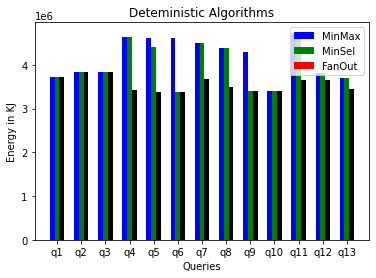

In [5]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 13
ind = np.arange(N) 
width=0.2
minMax= [3712304.07, 3841218.79, 3840691.11, 4629739.26, 4621327.38, 4622011.86, 4495912.24, 4381495.13, 4290192.8, 3407192.22, 4732824.17, 3800893.65, 3699906.69]
minSel= [3712304.07, 3841218.79, 3840691.11, 4629739.26, 4416439.28, 3385156.49, 4495912.24, 4381495.13, 3411857.09, 3407192.22, 4732824.17, 3800893.65, 3698548.23]
fanOut= [3712304.07, 3841218.79, 3840691.11, 3426705.52, 3385374.93, 3384339.11, 3677001.3, 3486168.04, 3404911.32, 3402744.9, 3646714.58, 3640972.02, 3442718.39]
EX= [3712304.07, 3841218.79, 3840691.11, 3426705.52, 3385374.93, 3384339.11, 3607811.05, 3486168.04, 3401511.34, 3399344.92, 3646714.58, 3640972.02, 3442532.71]

#minMax =[796637.7457803803, 787980.5626766306, 156437.6730167852, 1283317.3014757799, 1317248.6123321443, 1268020.204834618, 1292987.310294079, 1279223.8618705843, 1095472.7898222203, 769928.9374838091, 1457891.4285484806, 979584.785514016, 967550.5201730396]
#minSel =[780756.623496781, 732262.5623402961, 774688.3132024369, 1293370.6721384458, 1239862.486182253, 835715.4130097394, 1326400.2655926459, 1147124.5051723209, 825791.0167869068, 804582.2813920499, 1414932.9849663097, 990788.1658697512, 945085.003311369]
#fanOut= [809553.7078305382, 960718.5256743071, 775459.1430087277, 820901.3499955925, 838947.2970860056, 780780.7604659549, 1006091.8722474894, 868907.0500720588, 460672.1761600778, 75938.76066562942, 1036242.2507905501, 1233294.702127052, 264783.71012643876]
""""for i in range (0, 13):
    minMax[i]=minMax[i]/1000
    minSel[i]=minSel[i]/1000
    fanOut[i]=fanOut[i]/1000
print(minMax)
print(minSel)
print(fanOut)"""
bar1 = plt.bar(ind, minMax, width, color = 'b')
  

bar2 = plt.bar(ind+width, minSel, width, color='g')
  

bar3 = plt.bar(ind+width*2, fanOut, width, color = 'r')
bar4 = plt.bar(ind+width*2, fanOut, width, color = 'k')
  
plt.xlabel("Queries")
plt.ylabel('Energy in KJ')
plt.title("Deteministic Algorithms")
  
plt.xticks(ind+width,['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13'])
plt.legend( (bar1, bar2, bar3), ('MinMax', 'MinSel', 'FanOut') )
plt.savefig('f6.png')
plt.show()

NameError: name 'bar1' is not defined

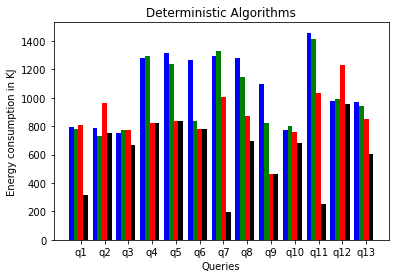

In [4]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 13
x= np.arange(N) 

#minMax= [3712304.07, 3841218.79, 3840691.11, 4629739.26, 4621327.38, 4622011.86, 4495912.24, 4381495.13, 4290192.8, 3407192.22, 4732824.17, 3800893.65, 3699906.69]
#minSel= [3712304.07, 3841218.79, 3840691.11, 4629739.26, 4416439.28, 3385156.49, 4495912.24, 4381495.13, 3411857.09, 3407192.22, 4732824.17, 3800893.65, 3698548.23]
#fanOut= [3712304.07, 3841218.79, 3840691.11, 3426705.52, 3385374.93, 3384339.11, 3677001.3, 3486168.04, 3404911.32, 3402744.9, 3646714.58, 3640972.02, 3442718.39]
#EX= [3712304.07, 3841218.79, 3840691.11, 3426705.52, 3385374.93, 3384339.11, 3607811.05, 3486168.04, 3401511.34, 3399344.92, 3646714.58, 3640972.02, 3442532.71]

#minMax=[41.198336000000005, 41.126665, 41.794729, 41.644387, 41.820867, 41.763777999999995, 41.799311, 41.768937, 42.180167999999995, 41.405572, 43.196133, 42.499321, 41.614618]
#minSel=[41.278620000000004, 41.801582, 41.272348, 41.90937400000001, 42.101523, 41.198106, 41.769211999999996, 41.629689, 41.277237, 41.272974999999995, 43.634589999999996, 42.074110999999995, 41.601859]
#fanOut=[41.016411999999995, 41.418279000000005, 40.972635000000004, 41.254633999999996, 41.713444, 41.325006, 41.861851, 41.952194000000006, 41.869526, 42.007093999999995, 44.816023, 44.154669999999996, 42.024105000000006]
#EX= [41.329860000000004, 41.411849000000004, 41.314254999999996, 41.581832999999996, 41.816528, 41.538232, 41.991249, 41.954786, 41.808592, 41.769534, 44.053117, 43.332791, 41.791993999999995]

minMax=[796.6377457803803, 787.9805626766306, 754.8818423373228, 1283.31730147578, 1317.2486123321444, 1268.020204834618, 1292.987310294079, 1279.2238618705844, 1095.4727898222204, 769.928937483809, 1457.8914285484807, 979.5847855140161, 967.5505201730397]
minSel=[780.756623496781, 732.2625623402961, 774.6883132024369, 1293.3706721384458, 1239.8624861822532, 835.7154130097393, 1326.4002655926458, 1147.1245051723208, 825.7910167869068, 804.5822813920498, 1414.9329849663097, 990.7881658697512, 945.085003311369]
fanOut=[809.5537078305382, 960.7185256743071, 775.4591430087277, 820.9013499955925, 838.9472970860056, 780.7807604659549, 1006.0918722474894, 868.9070500720588, 460.6721761600778, 759.3876066562942, 1036.24225079055, 1233.294702127052, 850.0398989936478]
EX= [317.075027946177, 752.9716475332899, 665.0355421186904, 820.5908980417631, 838.2204927066352, 780.4808999473011, 196.51968535078075, 693.9943158923857, 460.6266297627562, 684.3356856537572, 250.51061503739082, 959.1386001705824, 605.8708150885814]

ax = plt.subplot(111)
ax.bar(x-0.2, minMax, width=0.2, color='b', align='center')
ax.bar(x, minSel, width=0.2, color='g', align='center')
ax.bar(x+0.2, fanOut, width=0.2, color='r', align='center')
ax.bar(x+0.4, EX, width=0.2, color='k', align='center')

plt.xlabel("Queries")
plt.ylabel('Energy consumption in KJ')
plt.title("Deterministic Algorithms")
  
plt.xticks(x+0.2,['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13'])
plt.legend( (bar1, bar2, bar3,bar4), ('MinMax', 'MinSel', 'FanOut','Exaustif'), bbox_to_anchor=(1, 1.02),loc='upper left' )
plt.savefig('pictures/p12.png')
plt.show()



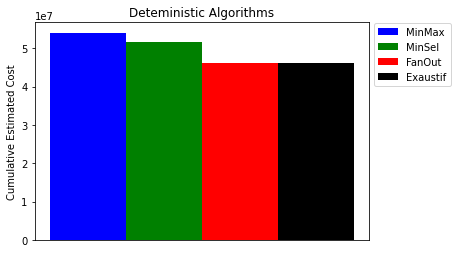

In [7]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 1
ind = np.arange(N) 
width = 0.2


54075709.36999999
51754271.72999999
46291864.08




bar1 = plt.bar(ind, 54075709.36999999, width, color = 'b')
  

bar2 = plt.bar(ind+width, 51754271.72999999, width, color='g')
  

bar3 = plt.bar(ind+width*2, 46291864.08 , width, color = 'r')
  
bar4 = plt.bar(ind+width*3, 46215688.19 , width, color = 'k')

plt.ylabel('Cumulative Estimated Cost')
plt.title("Deteministic Algorithms")
plt.xticks( [])  
plt.legend( (bar1, bar2, bar3, bar4), ('MinMax', 'MinSel', 'FanOut' , 'Exaustif'), bbox_to_anchor=(1, 1.02),loc='upper left' )
plt.savefig('pictures/p9.png')

plt.show()

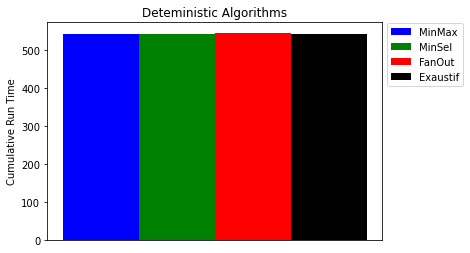

In [12]:

import numpy as np
import matplotlib.pyplot as plt
  
N = 1
ind = np.arange(N) 
width = 0.2


54075709.36999999
51754271.72999999
46291864.08




bar1 = plt.bar(ind, 543.812822, width, color = 'b')
  

bar2 = plt.bar(ind+width, 542.821226, width, color='g')
  

bar3 = plt.bar(ind+width*2, 546.385873 , width, color = 'r')
  
bar4 = plt.bar(ind+width*3, 542.821226 , width, color = 'k')

plt.ylabel('Cumulative Run Time')
plt.title("Deteministic Algorithms")
plt.xticks( [])  
plt.legend( (bar1, bar2, bar3, bar4), ('MinMax', 'MinSel', 'FanOut' , 'Exaustif'), bbox_to_anchor=(1, 1.02),loc='upper left' )
plt.savefig('pictures/p12.png')

plt.show()

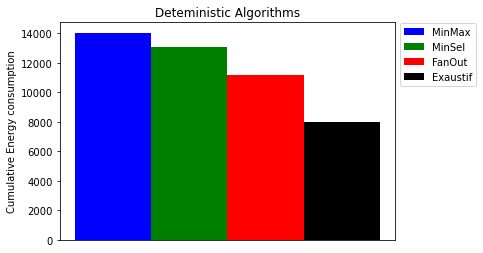

In [8]:

import numpy as np
import matplotlib.pyplot as plt
  
N = 1
ind = np.arange(N) 
width = 0.2


#14050.725903143106
#13111.360293461306
#11200.996341108295
#8025.37085525009



bar1 = plt.bar(ind,14050.725903143106, width, color = 'b')
  

bar2 = plt.bar(ind+width, 13111.360293461306, width, color='g')
  

bar3 = plt.bar(ind+width*2, 11200.996341108295 , width, color = 'r')
  
bar4 = plt.bar(ind+width*3, 8025.37085525009, width, color = 'k')

plt.ylabel('Cumulative Energy consumption')
plt.title("Deteministic Algorithms")
plt.xticks( [])  
plt.legend( (bar1, bar2, bar3, bar4), ('MinMax', 'MinSel', 'FanOut' , 'Exaustif'), bbox_to_anchor=(1, 1.02),loc='upper left' )
plt.savefig('pictures/p12.png')

plt.show()

In [5]:



minMax= [796.6377457803803, 787.9805626766306, 156.4376730167852, 1283.31730147578, 1317.2486123321444, 1268.020204834618, 1292.987310294079, 1279.2238618705844, 1095.4727898222204, 769.928937483809, 1457.8914285484807, 979.5847855140161, 967.5505201730397]
minSel =[780.756623496781, 732.2625623402961, 774.6883132024369, 1293.3706721384458, 1239.8624861822532, 835.7154130097393, 1326.4002655926458, 1147.1245051723208, 825.7910167869068, 804.5822813920498, 1414.9329849663097, 990.7881658697512, 945.085003311369]
fanOut= [809.5537078305382, 960.7185256743071, 775.4591430087277, 820.9013499955925, 838.9472970860056, 780.7807604659549, 1006.0918722474894, 868.9070500720588, 460.6721761600778, 75.93876066562942, 1036.24225079055, 1233.294702127052, 264.78371012643873]
minMaxCum=sum(minMax)
minSelCum=sum(minSel)
fanOutCum=sum(fanOut)
print(minMaxCum)
print(minSelCum)
print(fanOutCum)



13452.281733822569
13111.360293461306
9932.291306250421


In [39]:

ex =min((3712304.07, 3841218.79, 3840691.11, 3426705.52, 3385374.93, 3384339.11, 3607811.05, 3486168.04, 3401511.34, 3399344.92, 3646714.58, 3640972.02, 3442532.71))
print(ex)

3384339.11


In [2]:
from Exaustif import *
conn,cursor = connect_bdd("ssb")
input="SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit  FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey  AND c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14'  GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1 ;"
#input="SELECT c_city,s_city,d_year,SUM(lo_revenue) AS revenue FROM customer c,lineorder l,supplier s,date d WHERE  l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey AND l.lo_orderdate = d.d_datekey AND (c.c_city='UNITED KI1' OR c.c_city='UNITED KI5') AND (s.s_city='UNITED KI1' OR s.s_city='UNITED KI5') AND d.d_yearmonth = 'Dec1997'  GROUP BY  c.c_city, s.s_city, d.d_year ORDER BY  d.d_year ASC,  revenue DESC;"
solution = Exaustif(input,cursor)
print(solution)

joined tables ['date', 'customer', 'supplier', 'part', 'lineorder']
("SELECT d.d_year, s.s_city, p.p_brand1, SUM(l.lo_revenue - l.lo_supplycost) AS profit FROM lineorder AS l JOIN part AS p ON l.lo_partkey = p.p_partkey JOIN supplier AS s ON l.lo_suppkey = s.s_suppkey JOIN date AS d ON l.lo_orderdate = d.d_datekey JOIN customer AS c ON l.lo_custkey = c.c_custkey WHERE c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998) AND p.p_category = 'MFGR#14' GROUP BY d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1", 3442532.71)


In [1]:
from Exaustif import *
from queryParser import *
from pylab import *
import matplotlib.pyplot as plt

conn,cursor = connect_bdd("ssb")
EX=[]
sqlFiles=get_sqlFiles()
for file in sqlFiles:
    input = open(file, 'r').read()
    print("file",file)
    print("input" , input)

#q43="SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit  FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey AND  c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14' GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1;"
    sol=Exaustif(input,cursor)
    print("soooooool",sol)
    EX.append(sol[1])
    print("\n")
    

print("Ex",EX)

file C:/Users/zeblahm/Desktop/SSB/MinMax/queries\q1-1.sql
input SELECT 
  SUM(lo_extendedprice * lo_discount) AS revenue
FROM 
  lineorder l,
  date d
WHERE 
  l.lo_orderdate = d.d_datekey
  AND d.d_year = 1993
  AND l.lo_discount BETWEEN 1 AND 3
  AND l.lo_quantity < 25;

joined tables ['lineorder', 'date']
0
0
soooooool ('SELECT SUM(lo_extendedprice * lo_discount) AS revenue FROM lineorder AS l JOIN date AS d ON l.lo_orderdate = d.d_datekey WHERE d.d_year = 1993 AND l.lo_discount BETWEEN 1 AND 3 AND l.lo_quantity < 25', 3712304.07, ('lineorder', 'date'))


file C:/Users/zeblahm/Desktop/SSB/MinMax/queries\q4-3.sql
input SELECT 
  d_year,
  s_city,
  p_brand1,
  SUM(lo_revenue - lo_supplycost) AS profit
FROM 
  date d,
  customer c,
  supplier s,
  part p,
  lineorder l
WHERE 
  l.lo_custkey = c.c_custkey
  AND l.lo_suppkey = s.s_suppkey
  AND l.lo_partkey = p.p_partkey
  AND l.lo_orderdate = d.d_datekey
  AND c.c_region = 'AMERICA'
  AND s.s_nation = 'UNITED STATES'
  AND (d.d_year = 

In [3]:
Ex=sum([-29324.007697579465, 752971.6475332899, 665035.5421186904, 850590.8980417631, 838220.4927066352, 804480.8999473011, 196519.68535078075, 693994.3158923857, 749626.6297627562, 684335.6856537572, 250510.61503739082, 959138.6001705824, 605870.8150885814])
Ex

8021971.819606334

In [3]:
from MinMax import *
from queryParser import *
from pylab import *
import matplotlib.pyplot as plt

conn,cursor = connect_bdd("ssb")
f=[]
sqlFiles=get_sqlFiles()
for file in sqlFiles:
    input = open(file, 'r').read()
    print("file",file)
    print("input" , input)

#q43="SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit  FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey AND  c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14' GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1;"
    f.append(MinMax(input,cursor,3)['energy'])
    print("\n")
    

print("minmax",f)


file C:/Users/zeblahm/Desktop/SSB/MinMax/queries\q1-1.sql
input SELECT 
  SUM(lo_extendedprice * lo_discount) AS revenue
FROM 
  lineorder l,
  date d
WHERE 
  l.lo_orderdate = d.d_datekey
  AND d.d_year = 1993
  AND l.lo_discount BETWEEN 1 AND 3
  AND l.lo_quantity < 25;

joined tables ['lineorder', 'date']
state ['date', 'lineorder']
initiale power 39.885636


file C:/Users/zeblahm/Desktop/SSB/MinMax/queries\q1-3.sql
input SELECT 
  SUM(lo_extendedprice * lo_discount) AS revenue
FROM 
  lineorder l,
  date d
WHERE 
  l.lo_orderdate = d.d_datekey
  AND d.d_weeknuminyear = 6
  AND d.d_year = 1994
  AND l.lo_discount BETWEEN 5 AND 7
  AND l.lo_quantity BETWEEN 26 AND 35;

joined tables ['lineorder', 'date']
state ['date', 'lineorder']
initiale power 40.763867999999995


minmax [785454.9862447652, 754881.8423373228]


In [7]:
minMax=[796.6377457803803, 787.9805626766306, 754.8818423373228, 1283.31730147578, 1317.2486123321444, 1268.020204834618, 1292.987310294079, 1279.2238618705844, 1095.4727898222204, 769.928937483809, 1457.8914285484807, 979.5847855140161, 967.5505201730397]
minSel=[780.756623496781, 732.2625623402961, 774.6883132024369, 1293.3706721384458, 1239.8624861822532, 835.7154130097393, 1326.4002655926458, 1147.1245051723208, 825.7910167869068, 804.5822813920498, 1414.9329849663097, 990.7881658697512, 945.085003311369]
fanOut=[809.5537078305382, 960.7185256743071, 775.4591430087277, 820.9013499955925, 838.9472970860056, 780.7807604659549, 1006.0918722474894, 868.9070500720588, 460.6721761600778, 759.3876066562942, 1036.24225079055, 1233.294702127052, 850.0398989936478]
EX= [317.075027946177, 752.9716475332899, 665.0355421186904, 820.5908980417631, 838.2204927066352, 780.4808999473011, 196.51968535078075, 693.9943158923857, 460.6266297627562, 684.3356856537572, 250.51061503739082, 959.1386001705824, 605.8708150885814]
print(sum(minMax))
print(sum(minSel))
print(sum(fanOut))
print(sum(EX))

14050.725903143106
13111.360293461306
11200.996341108295
8025.37085525009


In [2]:
from MinMax import *
from queryParser import *
from pylab import *
import matplotlib.pyplot as plt

conn,cursor = connect_bdd("ssb")
input="SELECT d_year, s_city, p_brand1, SUM(lo_revenue - lo_supplycost) AS profit FROM part AS p JOIN lineorder AS l ON l.lo_partkey = p.p_partkey JOIN supplier AS s ON l.lo_suppkey = s.s_suppkey JOIN date AS d ON l.lo_orderdate = d.d_datekey JOIN customer AS c ON l.lo_custkey = c.c_custkey WHERE c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998) AND p.p_category = 'MFGR#14' GROUP BY d_year, s_city, p_brand1 ORDER BY d_year,s_city,p_brand1"
print(get_energy(input,cursor))

initiale power 39.058566
886408.3332593931
